# Community Detection - Lab

## Introduction

In this lab, you'll once again work to cluster a network dataset. This time, you'll be investigating a [Meetup](https://www.meetup.com/) dataset for events occurring in Nashville.

## Objectives

You will be able to: 

- Make visualizations of clusters and gain insights about how the clusters have formed 
- Cluster a real-life social network dataset to detect communities within the network  


## Load the Dataset

To get started, load the dataset `'nashville-meetup/group-edges.csv'` as a pandas Dataframe. 

In [1]:
# Your code here
import pandas as pd

groups = pd.read_csv('nashville-meetup/group-edges.csv')
groups.head()

Unnamed: 0    group1    group2  weight
0           0  19292162    535553       2
1           1  19292162  19194894       1
2           2  19292162  19728145       1
3           3  19292162  18850080       2
4           4  19292162   1728035       1

To add some descriptive data, import the file `'nashville-meetup/meta-groups.csv'`.

In [3]:
# Your code here
groups_meta = pd.read_csv('nashville-meetup/meta-groups.csv')
groups_meta.head()

group_id                                 group_name  num_members  \
0    339011                    Nashville Hiking Meetup        15838   
1  19728145           Stepping Out Social Dance Meetup         1778   
2   6335372                           Nashville soccer         2869   
3  10016242                                     NashJS         1975   
4  21174496  20's & 30's Women looking for girlfriends         2782   

   category_id         category_name  organizer_id             group_urlname  
0           23  Outdoors & Adventure       4353803          nashville-hiking  
1            5               Dancing     118484462    steppingoutsocialdance  
2           32   Sports & Recreation     108448302          Nashville-soccer  
3           34                  Tech       8111102                    nashjs  
4           31           Socializing     184580248  new-friends-in-Nashville

## Transform to a Network Representation

Take the Pandas DataFrame and transform it into a graph representation via NetworkX. Make nodes the names of the various groups within the Nashville area. The edges should be the weights between these groups.

In [10]:
# Your code here
import networkx as nx

group_dict = dict(zip(groups_meta['group_id'], groups_meta['group_name']))
G = nx.Graph()
for row in groups.index:
    g1 = group_dict[groups['group1'][row]]
    g2 = group_dict[groups['group2'][row]]
    weight = groups['weight'][row]
    G.add_edge(g1, g2, weight=weight)

## Visualize the Network

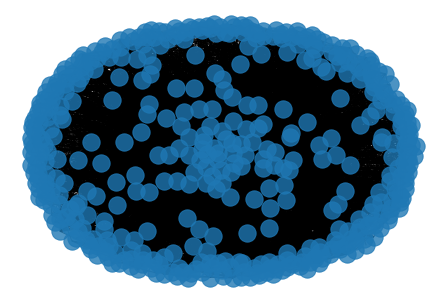

In [11]:
# Your code here
import matplotlib.pyplot as plt
%matplotlib inline

nx.draw(G, pos=nx.spring_layout(G, k=2, seed=5), alpha=0.8)

## Refine the Visual

As you should see, the initial visualization is a globular mess! Refine the visualization to better picture the center core of the  network.

In [8]:
# Your code here
for i in range(0,100,5):
    print(f"{i}th percentile: {groups['weight'].quantile(q=i/100)}")

0th percentile: 1.0
5th percentile: 1.0
10th percentile: 1.0
15th percentile: 1.0
20th percentile: 1.0
25th percentile: 1.0
30th percentile: 1.0
35th percentile: 1.0
40th percentile: 1.0
45th percentile: 1.0
50th percentile: 1.0
55th percentile: 1.0
60th percentile: 1.0
65th percentile: 1.0
70th percentile: 2.0
75th percentile: 2.0
80th percentile: 2.0
85th percentile: 3.0
90th percentile: 4.0
95th percentile: 7.0


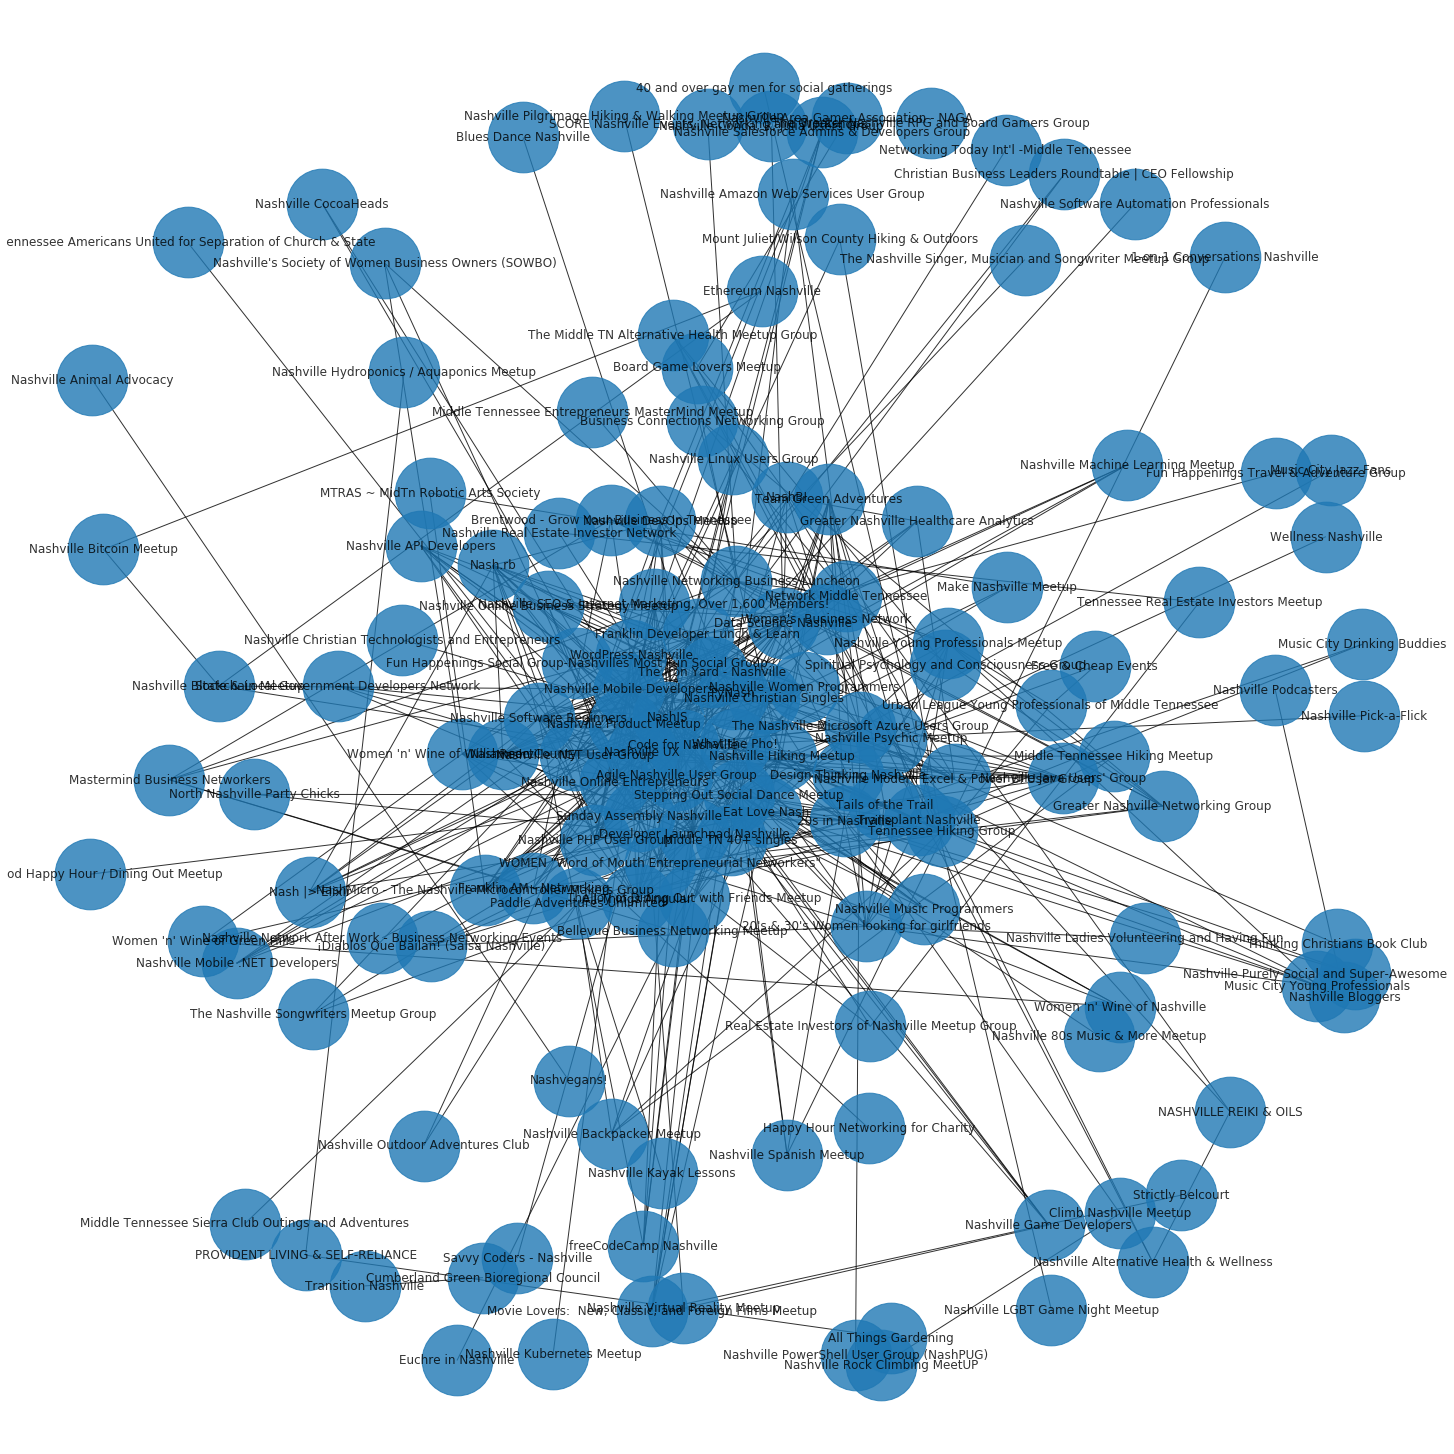

In [13]:
threshold = 5
G1 = nx.Graph()
for row in groups.index:
    g1 = group_dict[groups['group1'][row]]
    g2 = group_dict[groups['group2'][row]]
    weight = groups['weight'][row]
    if weight > threshold:
        G1.add_edge(g1, g2, weight=weight)
        
plt.figure(figsize=(20,20))
nx.draw(G1, pos=nx.spring_layout(G, k=2, seed=5), alpha=0.8,
       node_size=5000, with_labels=True)

## Cluster the Network

Now, that the dataset is a little more manageable, try clustering the remaining group nodes.

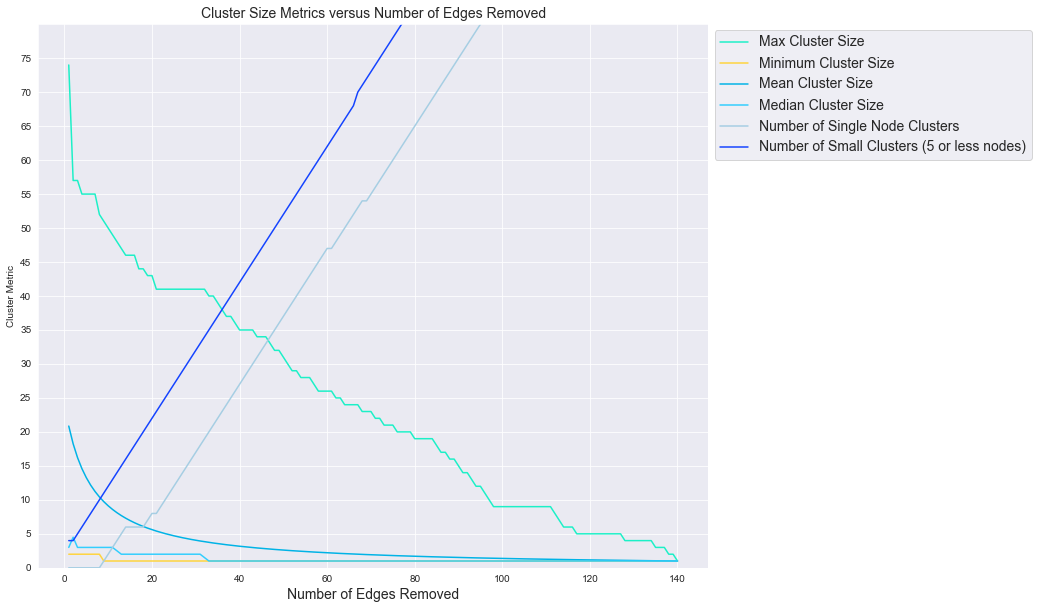

In [14]:
# Your code here
gn_clusters = list(nx.algorithms.community.centrality.girvan_newman(G1))

import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
colors = ['#1cf0c7','#ffd43d','#00b3e6','#32cefe','#efefef',
          '#1443ff','#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99',
          '#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99',
          '#b15928','#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3',
          '#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5',
          '#ffed6f','#bf812d','#dfc27d','#f6e8c3','#f5f5f5','#c7eae5',
          '#80cdc1', '#35978f', '#01665e', '#003c30']

fig = plt.figure(figsize=(12,10))

x = [n+1 for n in range(len(gn_clusters))]

max_cluster_size = [max([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,max_cluster_size, color=colors[0], label='Max Cluster Size')

min_cluster_size = [min([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,min_cluster_size, color=colors[1], label='Minimum Cluster Size')

mean_cluster_size = [np.mean([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,mean_cluster_size, color=colors[2], label='Mean Cluster Size')

median_cluster_size = [np.median([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,median_cluster_size, color=colors[3], label='Median Cluster Size')

single_node_clusters = [sum([1 if len(c)==1 else 0 for c in cluster]) for cluster in gn_clusters]
plt.plot(x,single_node_clusters, color=colors[6], label='Number of Single Node Clusters')

small_clusters = [sum([1 if len(c)<=5 else 0 for c in cluster ]) for cluster in gn_clusters]
plt.plot(x,small_clusters, color=colors[5], label='Number of Small Clusters (5 or less nodes)')

plt.legend(loc=(1.01,.75), fontsize=14)
plt.title('Cluster Size Metrics versus Number of Edges Removed', fontsize=14)
plt.xlabel('Number of Edges Removed', fontsize=14)
plt.ylabel('Cluster Metric')
plt.ylim(0,80)
plt.yticks(ticks=list(range(0,80,5)))
plt.show()

## Determine An Optimal Clustering Schema

Finally, determine a final clustering organization.

C:\Users\Devin\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


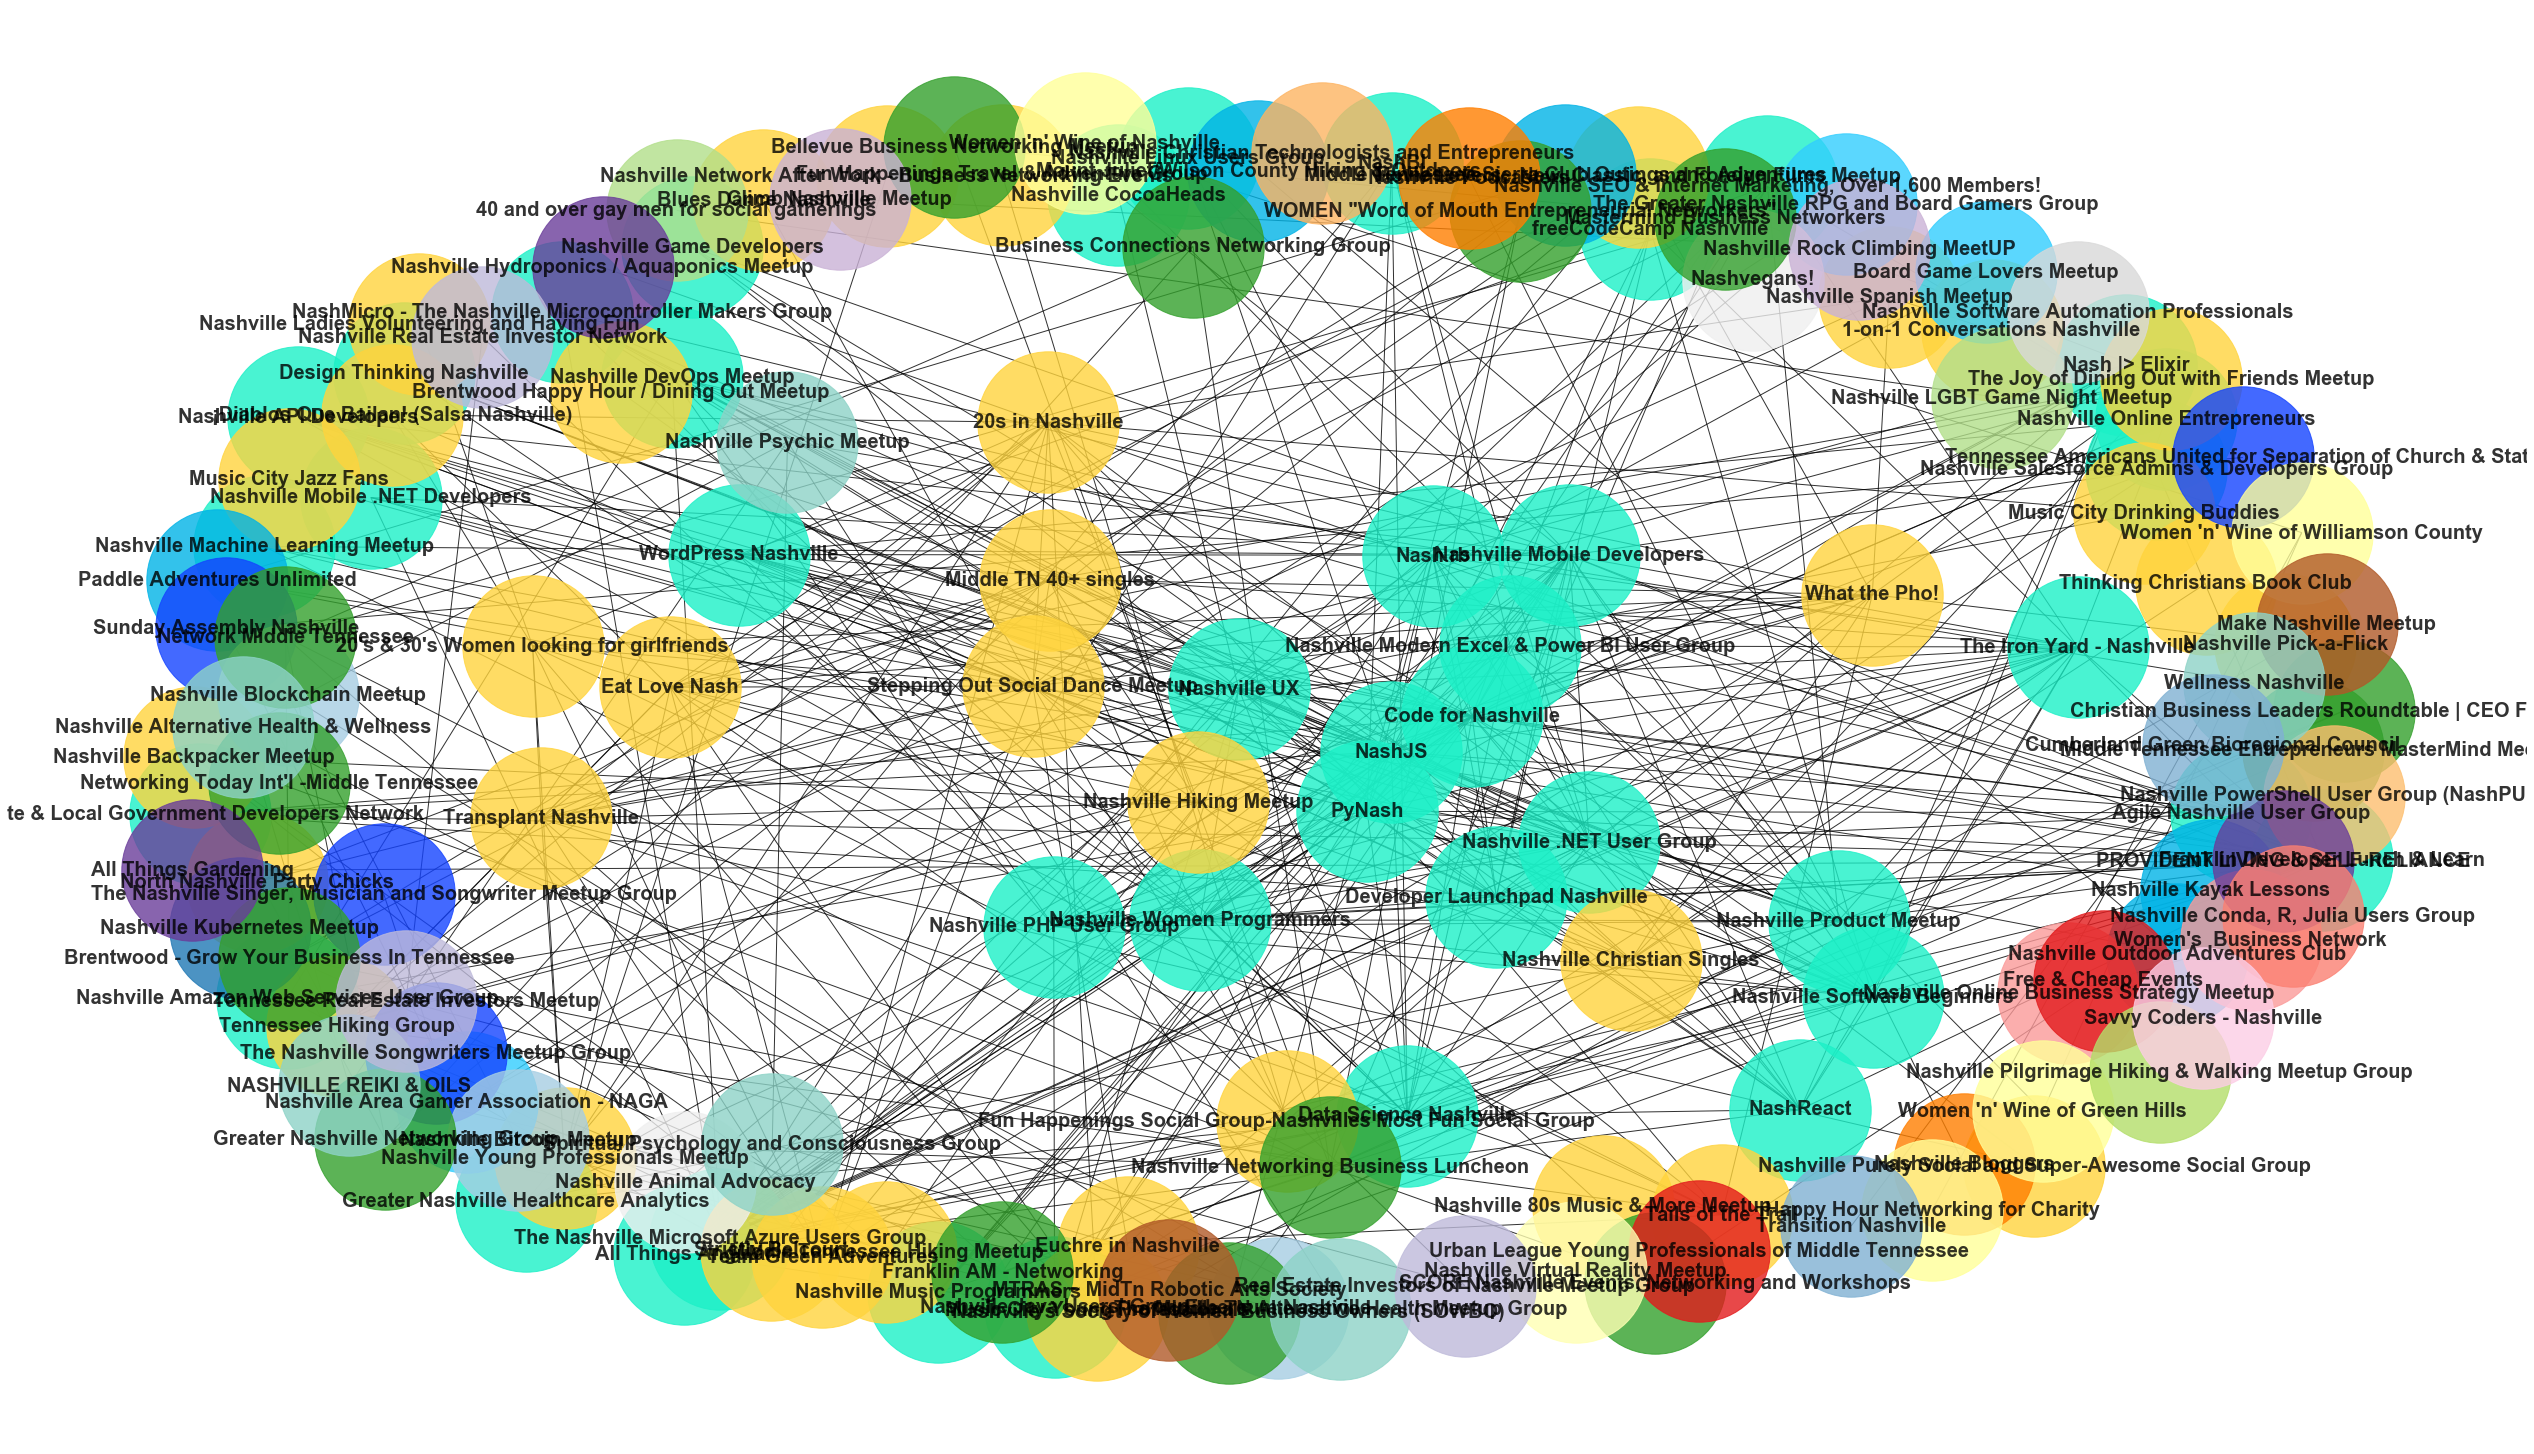

In [17]:
# Your code here
def plot_girvan_newman(G, clusters):
    #Your code here
    fig = plt.figure(figsize=(35,20))
    colors = ['#1cf0c7','#ffd43d','#00b3e6','#32cefe','#efefef',
              '#1443ff','#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99',
              '#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99',
              '#b15928','#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3',
              '#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5',
              '#ffed6f','#bf812d','#dfc27d','#f6e8c3','#f5f5f5','#c7eae5',
              '#80cdc1', '#35978f', '#01665e', '#003c30']
    for n , c in enumerate(clusters):
        ci = G.subgraph(c)
        nx.draw(ci, pos=nx.spring_layout(G1, k=3.6, seed=3), with_labels=True, node_color=colors[n],
                alpha=0.8, node_size=20000, font_weight='bold', font_size=20)
    plt.show()
sns.set_style('white')
plot_girvan_newman(G1, gn_clusters[20])

## Visualize the Clusters

Analyze the output of your clustering schema. Do any clusters of groups stand out to you?

In [18]:
# Your code here
# Because the Network is still dense and names are long, organizing the clusters as a Pandas dataframe is appropriate
clusters = pd.DataFrame(gn_clusters[20]).transpose()
clusters.columns = ['Cluster{}'.format(i) for i in range(1,len(clusters.columns)+1)]
clusters

# Many of the clusters are easily identifiable;
# You can see that cluster 1 is a technology group,
# cluster 2 is a social hodgepodge,
# cluster3 is outdoor enthusiasts,
# cluster4 is gamers, and so forth

Cluster1  \
0                                              NashBI   
1                                  Code for Nashville   
2                                        Nashville UX   
3            Nashville Amazon Web Services User Group   
4              Greater Nashville Healthcare Analytics   
5                            Nashville API Developers   
6   NashMicro - The Nashville Microcontroller Make...   
7                    Nashville Mobile .NET Developers   
8                           Nashville .NET User Group   
9                                           NashReact   
10                          Nashville Game Developers   
11                     Nashville Online Entrepreneurs   
12                        Nashville Java Users' Group   
13        State & Local Government Developers Network   
14                         Agile Nashville User Group   
15                          Design Thinking Nashville   
16          The Nashville Microsoft Azure Users Group   
17                        Nashville Linux Users Group   
18                   Franklin Developer Lunch & Learn   
19                            Nashville DevOps Meetup   
20                          The Iron Yard - Nashville   
21                                 All Things Angular   
22                           Nashville PHP User Group   
23                                            Nash.rb   
24                  Nashville Machine Learning Meetup   
25                               Nashville CocoaHeads   
26                        Nashville Music Programmers   
27                             Data Science Nashville   
28                                             PyNash   
29                                     Nash |> Elixir   
30       Nashville Modern Excel & Power BI User Group   
31     Nashville Salesforce Admins & Developers Group   
32                                             NashJS   
33                        Nashville Mobile Developers   
34                             freeCodeCamp Nashville   
35                      Developer Launchpad Nashville   
36                        Nashville Women Programmers   
37                                WordPress Nashville   
38  Nashville SEO & Internet Marketing, Over 1,600...   
39                           Nashville Product Meetup   
40                       Nashville Software Beginners   

                                             Cluster2  \
0                               Blues Dance Nashville   
1           The Joy of Dining Out with Friends Meetup   
2        Nashville Ladies Volunteering and Having Fun   
3                                Transplant Nashville   
4                                 Euchre in Nashville   
5                             Nashville Hiking Meetup   
6                                   Strictly Belcourt   
7                                    20s in Nashville   
8                    Stepping Out Social Dance Meetup   
9                         Music City Drinking Buddies   
10           Brentwood Happy Hour / Dining Out Meetup   
11                           Nashville Spanish Meetup   
12                     1-on-1 Conversations Nashville   
13  Movie Lovers:  New, Classic, and Foreign Films...   
14                        Nashville Christian Singles   
15                                 Tails of the Trail   
16             ¡Diablos Que Bailan! (Salsa Nashville)   
17  Fun Happenings Social Group-Nashvilles Most Fu...   
18                               Music City Jazz Fans   
19                              Middle TN 40+ singles   
20            Fun Happenings Travel & Adventure Group   
21  Nashville Network After Work - Business Networ...   
22                       North Nashville Party Chicks   
23                             Tennessee Hiking Group   
24                             Nashville Pick-a-Flick   
25               Nashville Young Professionals Meetup   
26                     Middle Tennessee Hiking Meetup   
27                                      Eat Love Nash 

## Summary

In this lab, you got another chance to practice your network clustering skills, investigating a meetup dataset of events and groups surrounding the Nashville area. If you're up for the challenge, feel free to continue investigating the dataset and trying to cluster users or events!                                                                                                                                                               